In [2]:
#데이터 불러오기
import pandas as pd
df = pd.read_csv('서울대기오염.csv', encoding='utf-8-sig')
df.head()

,날짜,측정소명,미세먼지,초미세먼지,오존,이산화질소\nNO2 (ppm),일산화탄소\nCO (ppm),아황산가스\nSO2(ppm)
0,전체,평균,42.0,25.0,0.025,0.028,0.5,0.004
1,2019-12-31,평균,26.0,15.0,0.022,0.016,0.4,0.003
2,2019-12-31,강남구,22.0,14.0,0.025,0.014,0.4,0.003
3,2019-12-31,강동구,27.0,19.0,0.019,0.020,0.4,0.003
4,2019-12-31,강북구,31.0,17.0,0.022,0.022,0.4,0.002


In [3]:
#1-2분석변수만 추출 및 컬럼명 변경
df = df[['날짜', '측정소명', '미세먼지', '초미세먼지']]
df.columns = ['date', 'district', 'pm10', 'pm2.5']
df.head()

,date,district,pm10,pm2.5
0,전체,평균,42.0,25.0
1,2019-12-31,평균,26.0,15.0
2,2019-12-31,강남구,22.0,14.0
3,2019-12-31,강동구,27.0,19.0
4,2019-12-31,강북구,31.0,17.0


In [4]:
#1-3 결측치 확인 및 제
print("결측치 개수 확인:")
print(df.isnull().sum())

결측치 개수 확인:
date          0
district      0
pm10        213
pm2.5       203
dtype: int64


In [5]:
df = df.dropna()

In [6]:
#1-4 자료형 변환
df['date'] = pd.to_datetime(df['date'], errors='coerce')
df['pm10'] = pd.to_numeric(df['pm10'], errors='coerce')
df['pm2.5'] = pd.to_numeric(df['pm2.5'], errors='coerce')
df = df.dropna(subset=['date', 'pm10', 'pm2.5'])
print("컬럼별 자료형:")
print(df.dtypes)
df.head()

컬럼별 자료형:
date        datetime64[ns]
district            object
pm10               float64
pm2.5              float64
dtype: object


<ipython-input-6-e0e390deaf12>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['date'] = pd.to_datetime(df['date'], errors='coerce')


,date,district,pm10,pm2.5
1,2019-12-31,평균,26.0,15.0
2,2019-12-31,강남구,22.0,14.0
3,2019-12-31,강동구,27.0,19.0
4,2019-12-31,강북구,31.0,17.0
5,2019-12-31,강서구,29.0,16.0


In [7]:
#2-1 month, day 파생변수 생성
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day
df[['date', 'month', 'day']].head()

,date,month,day
1,2019-12-31,12,31
2,2019-12-31,12,31
3,2019-12-31,12,31
4,2019-12-31,12,31
5,2019-12-31,12,31


In [8]:
#2-2 계절 변수 생성
def get_season(month):
    if month in [3, 4, 5]:
        return 'spring'
    elif month in [6, 7, 8]:
        return 'summer'
    elif month in [9, 10, 11]:
        return 'autumn'
    else:
        return 'winter'
df['season'] = df['month'].apply(get_season)
df[['date', 'month', 'season']].head()


,date,month,season
1,2019-12-31,12,winter
2,2019-12-31,12,winter
3,2019-12-31,12,winter
4,2019-12-31,12,winter
5,2019-12-31,12,winter


In [9]:
#3-1 최종 분석 대상 데이터 확인
df[['date', 'district', 'pm10', 'pm2.5', 'month', 'day', 'season']].head()

,date,district,pm10,pm2.5,month,day,season
1,2019-12-31,평균,26.0,15.0,12,31,winter
2,2019-12-31,강남구,22.0,14.0,12,31,winter
3,2019-12-31,강동구,27.0,19.0,12,31,winter
4,2019-12-31,강북구,31.0,17.0,12,31,winter
5,2019-12-31,강서구,29.0,16.0,12,31,winter


In [10]:
#3-2 csv 저장
df.to_csv('card_output.csv', index=False, encoding='utf-8-sig')
from google.colab import files
files.download('card_output.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [11]:
#4-1 전체 데이터 기준 PM10의 평균
avg_pm10 = df['pm10'].mean()
print(f"평균 PM10: {avg_pm10:.2f} ㎍/m³")

평균 PM10: 41.76 ㎍/m³


In [12]:
#5-1 pm10 최댓값이 발생한 날짜, 구 확인
max_pm10 = df['pm10'].max()
max_record = df[df['pm10'] == max_pm10][['date', 'district', 'pm10']]
print("PM10 최댓값 정보:")
print(max_record)

PM10 최댓값 정보:
           date district   pm10
7830 2019-03-05      강북구  228.0


In [13]:
#6-1 구별 pm10 평균 계산 및 상위 5개 출력
district_avg = df.groupby('district')['pm10'].mean().reset_index()
top5_districts = district_avg.sort_values(by='pm10', ascending=False).head(5)
top5_districts.columns = ['district', 'avg_pm10']
print("PM10 평균 상위 5개 구:")
print(top5_districts)

PM10 평균 상위 5개 구:
   district   avg_pm10
4       관악구  49.083601
18      양천구  47.695055
12      마포구  47.086154
3       강서구  46.504132
2       강북구  44.950685


In [14]:
#7-1 계절별 평균 계산 및 정렬
season_avg = df.groupby('season')[['pm10', 'pm2.5']].mean().reset_index()
season_avg = season_avg.sort_values(by='pm10')
season_avg.columns = ['season', 'avg_pm10', 'avg_pm2.5']
print("계절별 평균 미세먼지:")
print(season_avg)

계절별 평균 미세먼지:
   season   avg_pm10  avg_pm2.5
2  summer  26.321307  18.087861
0  autumn  31.118349  15.703211
1  spring  54.088629  31.558110
3  winter  54.681682  33.660232


In [15]:
#8-1 pm10 등급분류
def pm_grade(value):
    if value <= 30:
        return 'good'
    elif value <= 80:
        return 'normal'
    elif value <= 150:
        return 'bad'
    else:
        return 'worse'
df['pm_grade'] = df['pm10'].apply(pm_grade)

#8-2 빈도, 비율 계산
grade_counts = df['pm_grade'].value_counts().reset_index()
grade_counts.columns = ['pm_grade', 'n']
grade_counts['pct'] = round(grade_counts['n'] / grade_counts['n'].sum() * 100, 2)
print("PM10 등급 분포:")
print(grade_counts)

PM10 등급 분포:
  pm_grade     n    pct
0   normal  5005  54.06
1     good  3543  38.27
2      bad   627   6.77
3    worse    84   0.91


In [16]:
#9-1 good 비율 계산
good_counts = df[df['pm_grade'] == 'good'].groupby('district').size().reset_index(name='n_good')
total_counts = df.groupby('district').size().reset_index(name='total')
merged = pd.merge(good_counts, total_counts, on='district')
merged['pct'] = round(merged['n_good'] / merged['total'] * 100, 2)
top5_good = merged.sort_values(by='pct', ascending=False).head(5)
#9-2 상위 5개 구 정렬
print("good 등급 비율 상위 5개 구:")
print(top5_good[['district', 'n_good', 'pct']])

good 등급 비율 상위 5개 구:
   district  n_good    pct
20      용산구     196  53.99
23       중구     169  46.30
24      중랑구     150  46.01
22      종로구     162  44.51
9       도봉구     162  44.38


<ipython-input-17-29e9ff1bd1f4>:11: UserWarning: Glyph 13197 (\N{SQUARE MU G}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 13197 (\N{SQUARE MU G}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


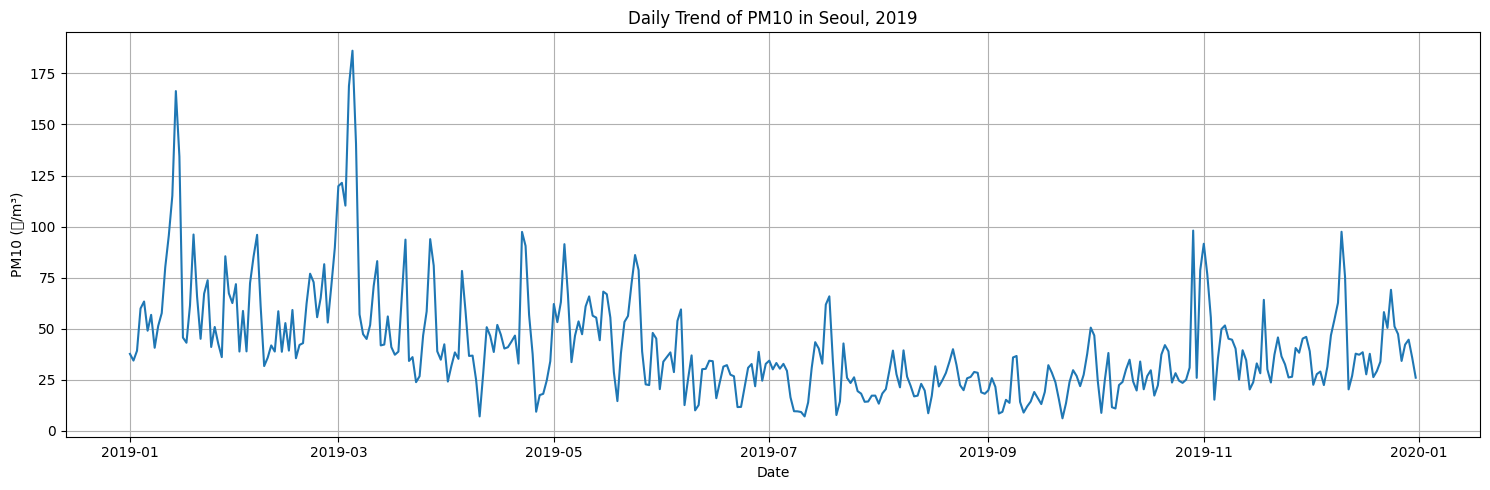

In [17]:
#10-1 일별 평균 pm10 추이 시각화
import matplotlib.pyplot as plt
import seaborn as sns
daily_avg = df.groupby('date')['pm10'].mean().reset_index()
plt.figure(figsize=(15, 5))
sns.lineplot(data=daily_avg, x='date', y='pm10')
plt.title('Daily Trend of PM10 in Seoul, 2019')
plt.xlabel('Date')
plt.ylabel('PM10 (㎍/m³)')
plt.grid(True)
plt.tight_layout()
plt.show()

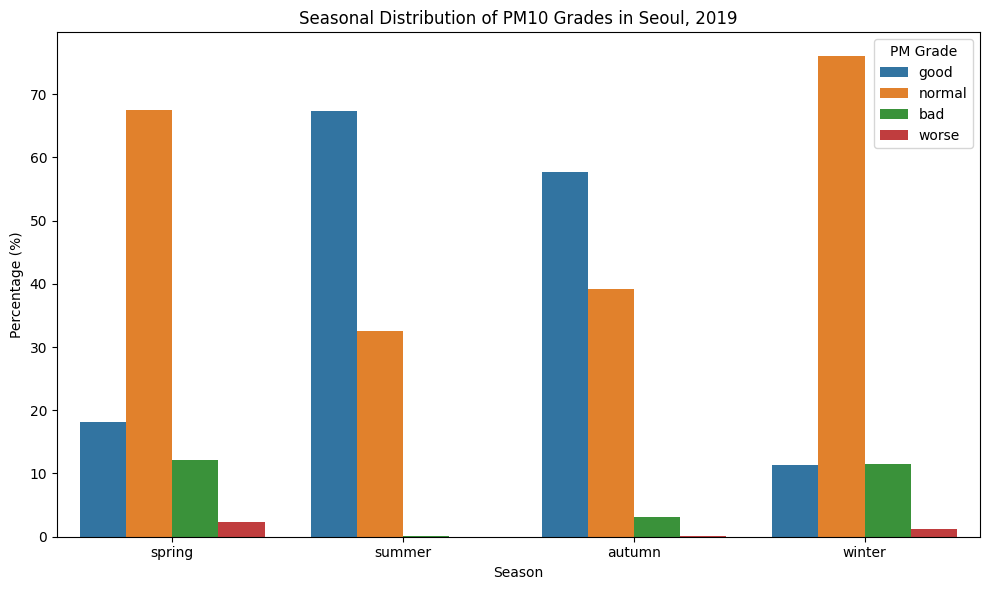

In [18]:
#11-1,2,3 계절별 pm10 등급 분포 시각
season_grade_counts = df.groupby(['season', 'pm_grade']).size().reset_index(name='n')
season_totals = df.groupby('season').size().reset_index(name='total')
season_dist = pd.merge(season_grade_counts, season_totals, on='season')
season_dist['pct'] = round(season_dist['n'] / season_dist['total'] * 100, 2)
grade_order = ['good', 'normal', 'bad', 'worse']
season_order = ['spring', 'summer', 'autumn', 'winter']
plt.figure(figsize=(10, 6))
sns.barplot(data=season_dist, x='season', y='pct', hue='pm_grade',
            hue_order=grade_order, order=season_order)
plt.title('Seasonal Distribution of PM10 Grades in Seoul, 2019')
plt.xlabel('Season')
plt.ylabel('Percentage (%)')
plt.legend(title='PM Grade')
plt.tight_layout()
plt.show()